In [7]:
'''Feature engineering is the most important aspect of a data science model development. 
There are several categories of features in a raw dataset. Features can be text, date/time, categorical, 
and continuous variables. 
For a machine learning model, the dataset needs to be processed in the form of numerical vectors to train it using an 
ML algorithm.

The objective of this article is to demonstrate feature engineering techniques to transform a categorical feature into a continuous feature and vice-versa.

Feature Binning: 
    Conversion of a continuous variable to categorical.
Feature Encoding: 
    Conversion of a categorical variable to numerical features.'''

'Feature engineering is the most important aspect of a data science model development. \nThere are several categories of features in a raw dataset. Features can be text, date/time, categorical, \nand continuous variables. \nFor a machine learning model, the dataset needs to be processed in the form of numerical vectors to train it using an \nML algorithm.\n\nThe objective of this article is to demonstrate feature engineering techniques to transform a categorical feature into a continuous feature and vice-versa.\n\nFeature Binning: \n    Conversion of a continuous variable to categorical.\nFeature Encoding: \n    Conversion of a categorical variable to numerical features.'

In [2]:
# so Feature Binning will convert height value 180 cm to Tall and 160 to Average

In [6]:
"""Feature Binning / Discretization:

Binning or discretization is used for the transformation of a continuous or numerical variable into a categorical feature. 
Binning of continuous variable introduces non-linearity and tends to improve the performance of the model. 
It can be also used to identify missing values or outliers.

There are two types of binning:

Unsupervised Binning: 
    Equal width binning, 
    Equal frequency binning
Supervised Binning: 
    Entropy-based binning"""

'Feature Binning:\n\nBinning or discretization is used for the transformation of a continuous or numerical variable into a categorical feature. \nBinning of continuous variable introduces non-linearity and tends to improve the performance of the model. \nIt can be also used to identify missing values or outliers.\n\nThere are two types of binning:\n\nUnsupervised Binning: \n    Equal width binning, \n    Equal frequency binning\nSupervised Binning: \n    Entropy-based binning'

In [8]:
"""Unsupervised Binning:

Unsupervised binning is a category of binning that transforms a numerical or continuous variable 
into categorical bins without considering the target class label into account. """

'Unsupervised Binning:\n\nUnsupervised binning is a category of binning that transforms a numerical or continuous variable \ninto categorical bins without considering the target class label into account. '

# Demostrate

In [10]:
import pandas as pd
import numpy as np

In [11]:
df = pd.read_csv("data.csv")

In [12]:
df.head()

,Id,Area,SaleCondition,GarageArea,HeatingQuality,SalePrice
0,1,8450,Normal,548,Ex,208500
1,2,9600,Normal,460,Ex,181500
2,3,11250,Normal,608,Ex,223500
3,4,9550,NotNormal,642,Gd,140000
4,5,14260,Normal,836,Ex,250000


#### Equal Width Binning

In [13]:
#Let us presume we want to create 5 bins

In [14]:
# let us apply Unsupervised Binning - Equal width binning on column 'SalePrice'

In [21]:
x = df['SalePrice'].sort_values()

In [23]:
x.head()

30     40000
29     68500
155    79000
68     80000
39     82000
Name: SalePrice, dtype: int64

In [26]:
var1 = x.min()

In [50]:
display(var1)

40000

In [27]:
var2 = x.max()

In [34]:
Price_range  = abs((var2 - var1))

In [28]:
# range 
# w = [(max - min) / x]

In [38]:
w  = round(abs((var1 - var2) / 10))


In [39]:
display(w)

46184

In [40]:
bins=[]
for i in range(10):
    bins.append(var1 + (i * w))

In [41]:
bins

[40000, 86184, 132368, 178552, 224736, 270920, 317104, 363288, 409472, 455656]

In [42]:
intervals = [i for i in range(var1, var2+w, w)]
intervals

[40000,
 86184,
 132368,
 178552,
 224736,
 270920,
 317104,
 363288,
 409472,
 455656,
 501840]

In [43]:
# let's make labels to label the different bins
labels = ['Bin_'+str(i) for i in range(1,len(intervals))]
labels

['Bin_1',
 'Bin_2',
 'Bin_3',
 'Bin_4',
 'Bin_5',
 'Bin_6',
 'Bin_7',
 'Bin_8',
 'Bin_9',
 'Bin_10']

In [44]:
# let's make labels to label the different bins
labels1 = ['Bin_'+str(i) for i in range(1,len(bins))]
labels1

['Bin_1',
 'Bin_2',
 'Bin_3',
 'Bin_4',
 'Bin_5',
 'Bin_6',
 'Bin_7',
 'Bin_8',
 'Bin_9']

In [54]:
# create binned SalePrice

# create one column with labels
df['SalePrice_disc_labels'] = pd.cut(x = df['SalePrice'] , bins=intervals, labels=labels, include_lowest=True)

# and one with bin boundaries
df['SalePrice_disc'] = pd.cut(x = df['SalePrice'], bins=intervals, include_lowest=True)




In [55]:
df.sample(10)

,Id,Area,SaleCondition,GarageArea,HeatingQuality,SalePrice,SalePrice_disc_labels,SalePrice_disc
183,184,11426,Normal,484,Ex,200000,Bin_4,"(178552.0, 224736.0]"
91,92,8500,NotNormal,480,TA,98600,Bin_2,"(86184.0, 132368.0]"
36,37,10859,Normal,672,Ex,145000,Bin_3,"(132368.0, 178552.0]"
33,34,10552,Normal,447,Gd,165500,Bin_3,"(132368.0, 178552.0]"
58,59,13682,NotNormal,641,Ex,438780,Bin_9,"(409472.0, 455656.0]"
165,166,10106,Normal,0,Gd,127500,Bin_2,"(86184.0, 132368.0]"
172,173,5306,Normal,504,Gd,239000,Bin_5,"(224736.0, 270920.0]"
134,135,10335,Normal,440,Gd,180000,Bin_4,"(178552.0, 224736.0]"
166,167,10708,Normal,303,Ex,190000,Bin_4,"(178552.0, 224736.0]"
96,97,10264,Normal,472,Ex,214000,Bin_4,"(178552.0, 224736.0]"


In [56]:
df.groupby('SalePrice_disc')['SalePrice'].count()

SalePrice_disc
(39999.999, 86184.0]     8
(86184.0, 132368.0]     50
(132368.0, 178552.0]    57
(178552.0, 224736.0]    38
(224736.0, 270920.0]    24
(270920.0, 317104.0]    10
(317104.0, 363288.0]     6
(363288.0, 409472.0]     3
(409472.0, 455656.0]     2
(455656.0, 501840.0]     2
Name: SalePrice, dtype: int64

#### Equal frequency binning

In [57]:
# This algorithm divides the data into various categories having approximately the same number of values. The values of data are distributed equally into the formed categories.

#     freq = n/x

# Notations,
# x = number of categories
# freq = frequency of a category
# n = number of values in data

# Demostrate via sklearn

In [78]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import KBinsDiscretizer
from sklearn. compose import ColumnTransformer
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [63]:
df = pd.read_csv("data.csv")

In [67]:
df.head()

,Id,Area,SaleCondition,GarageArea,HeatingQuality,SalePrice
0,1,8450,Normal,548,Ex,208500
1,2,9600,Normal,460,Ex,181500
2,3,11250,Normal,608,Ex,223500
3,4,9550,NotNormal,642,Gd,140000
4,5,14260,Normal,836,Ex,250000


In [70]:
x = df[['GarageArea', 'Area']]

In [71]:
x.head()

,GarageArea,Area
0,548,8450
1,460,9600
2,608,11250
3,642,9550
4,836,14260


In [72]:
y = df[['SalePrice']]

In [73]:
y.head()

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000


In [76]:
x_train,x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [77]:
x_train.head()

,GarageArea,Area
79,440,10440
197,795,25419
38,246,7922
24,270,8246
122,288,9464


In [79]:
clf = DecisionTreeClassifier()

In [80]:
clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [82]:
y_pred = clf.predict(x_test)

In [83]:
accuracy_score(y_test, y_pred)

0.0

In [87]:
np.mean(cross_val_score(DecisionTreeClassifier() , x, y, cv=2, scoring='accuracy' ) )

C:\Users\cefb8t\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


0.01

In [88]:
# So without applying any transformation accuracy score is 0.0

In [164]:
kbin_Area= KBinsDiscretizer(n_bins=10,encode= 'ordinal',strategy='quantile')
kbin_GarageArea= KBinsDiscretizer(n_bins=10,encode= 'ordinal',strategy='quantile')

In [165]:
trf = ColumnTransformer([
    ('first', kbin_Area, [1]),
    ('second', kbin_GarageArea, [0])
]
)

In [166]:
x_train_transform = trf.fit_transform(x_train)
x_test_transform = trf.transform(x_test)

In [168]:
output = pd.DataFrame({
    'GarageArea': x_train['GarageArea'],
    'GarageArea_transform': x_train_transform[:, 1],
    'Area': x_train['Area'],
    'Area_transform': x_train_transform[:, 0]
}
)

In [169]:
bins_range = trf.named_transformers_['second'].bin_edges_


In [170]:
output['Area_labels'] = pd.cut(x =x_train['Area'], 
                               bins=trf.named_transformers_['first'].bin_edges_[0].tolist())

In [171]:
output['GarageArea_labels'] = pd.cut(x =x_train['GarageArea'], 
                               bins=trf.named_transformers_['second'].bin_edges_[0].tolist())

In [172]:
output.head()

,GarageArea,GarageArea_transform,Area,Area_transform,Area_labels,GarageArea_labels
79,440,4.0,10440,6.0,"(10390.0, 10959.4]","(387.4, 440.0]"
197,795,9.0,25419,9.0,"(14201.5, 50271.0]","(736.4, 1166.0]"
38,246,1.0,7922,2.0,"(7200.0, 8191.8]","(240.0, 308.0]"
24,270,1.0,8246,3.0,"(8191.8, 8940.6]","(240.0, 308.0]"
122,288,1.0,9464,4.0,"(8940.6, 9570.5]","(240.0, 308.0]"


Text(0.5, 1.0, 'After')

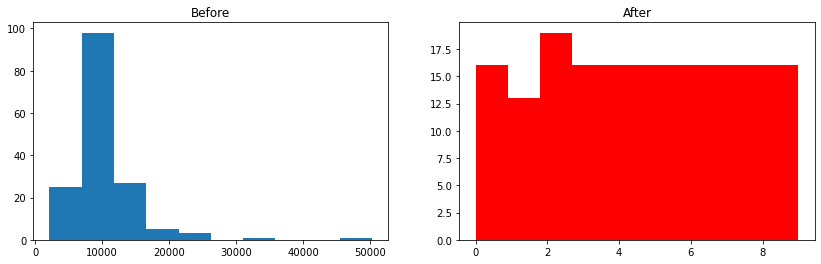

In [178]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,4))
plt.subplot(121)
plt.hist(x_train['Area'])
plt.title('Before')

plt.subplot(122)
plt.hist(output['Area_transform'], color='red')
plt.title('After')

# Another approach to code from ChatGpt

In [115]:
# Select the columns to be discretized
numeric_features = ['Area', 'GarageArea']

In [116]:
# Create the ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile'), numeric_features)
        
    ])

In [117]:
# Fit and transform the train set
x_train_transformed = preprocessor.fit_transform(x_train)

In [118]:
x_test_transform = preprocessor.fit_transform(x_test)

In [119]:
# Create new DataFrames for the transformed data
x_train_final = pd.DataFrame(x_train_transformed, columns=numeric_features)

In [120]:
x_test_final = pd.DataFrame(x_test_transform, columns=numeric_features)

In [128]:
# Add a column with the range for each bin
bins_range = preprocessor.named_transformers_['numeric'].bin_edges_


In [135]:
print(bins_range)

[array([ 1596. ,  5320.8,  7350.4,  7637.6,  8518. ,  9856. , 10266. ,
        10865.6, 12443.2, 13805.8, 19900. ])
 array([  0. , 200.1, 248. , 369.1, 440. , 480. , 515.6, 576. , 584. ,
        668.1, 852. ])                                                ]


In [130]:
range_column = pd.cut(x_train['Area'], 
                      bins=bins_range[0], labels=[f'({bins_range[0][i]}, {bins_range[0][i+1]})' for i in range(len(bins_range[0])-1)])


In [132]:
x_train_final['Range'] = range_column

In [134]:
x_train_final.head()

,Area,GarageArea,Range
0,6.0,4.0,"(7637.6, 8518.0)"
1,9.0,9.0,"(8518.0, 9856.0)"
2,2.0,1.0,"(10865.599999999999, 12443.2)"
3,3.0,1.0,"(8518.0, 9856.0)"
4,4.0,1.0,"(13805.800000000001, 19900.0)"


In [122]:
clf = DecisionTreeClassifier()

In [123]:
clf.fit(x_train_final, y_train)

DecisionTreeClassifier()

In [126]:
y_pred = clf.predict(x_test_final)

In [127]:
accuracy_score(y_test, y_pred)

0.0

Text(0.5, 1.0, 'After')

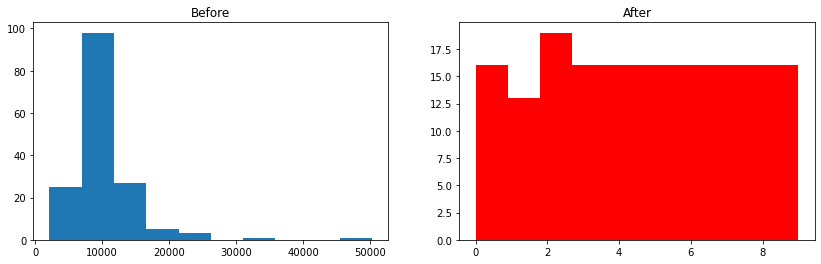

In [177]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,4))
plt.subplot(121)
plt.hist(x_train['Area'])
plt.title('Before')

plt.subplot(122)
plt.hist(x_train_final['Area'], color='red')
plt.title('After')

### Try Uniform

In [180]:
# Create the ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform'), numeric_features)
        
    ])

In [186]:
# Fit and transform the train set
x_train_transformed = preprocessor.fit_transform(x_train)
x_test_transform = preprocessor.fit_transform(x_test)


# Create new DataFrames for the transformed data
x_train_final = pd.DataFrame(x_train_transformed, columns=numeric_features)
x_test_final = pd.DataFrame(x_test_transform, columns=numeric_features)

In [187]:
# Add a column with the range for each bin
bins_range = preprocessor.named_transformers_['numeric'].bin_edges_


range_column = pd.cut(x_train['Area'], 
                      bins=bins_range[0], labels=[f'({bins_range[0][i]}, {bins_range[0][i+1]})' for i in range(len(bins_range[0])-1)])


In [188]:
x_train_final['Range'] = range_column

In [189]:
x_train_final.head()

,Area,GarageArea,Range
0,1.0,3.0,"(7087.200000000001, 8917.6)"
1,4.0,6.0,"(8917.6, 10748.0)"
2,1.0,2.0,"(10748.0, 12578.400000000001)"
3,1.0,2.0,"(8917.6, 10748.0)"
4,1.0,2.0,"(12578.400000000001, 14408.800000000001)"


Text(0.5, 1.0, 'After')

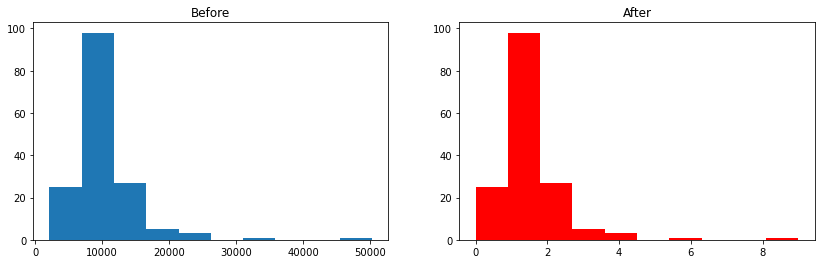

In [190]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,4))
plt.subplot(121)
plt.hist(x_train['Area'])
plt.title('Before')

plt.subplot(122)
plt.hist(x_train_final['Area'], color='red')
plt.title('After')

# Try KMeans

In [191]:
# Create the ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='kmeans'), numeric_features)
        
    ])

In [192]:
# Fit and transform the train set
x_train_transformed = preprocessor.fit_transform(x_train)
x_test_transform = preprocessor.fit_transform(x_test)


# Create new DataFrames for the transformed data
x_train_final = pd.DataFrame(x_train_transformed, columns=numeric_features)
x_test_final = pd.DataFrame(x_test_transform, columns=numeric_features)

C:\Users\cefb8t\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\cefb8t\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\cefb8t\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\cefb8t\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Wi

In [193]:
# Add a column with the range for each bin
bins_range = preprocessor.named_transformers_['numeric'].bin_edges_


range_column = pd.cut(x_train['Area'], 
                      bins=bins_range[0], labels=[f'({bins_range[0][i]}, {bins_range[0][i+1]})' for i in range(len(bins_range[0])-1)])


In [194]:
x_train_final['Range'] = range_column

In [195]:
x_train_final.head()

,Area,GarageArea,Range
0,3.0,4.0,"(6950.95, 8948.631818181817)"
1,7.0,7.0,"(8948.631818181817, 11011.381818181817)"
2,2.0,2.0,"(11011.381818181817, 12699.866666666665)"
3,2.0,2.0,"(8948.631818181817, 11011.381818181817)"
4,3.0,2.0,"(12699.866666666665, 14335.166666666666)"


Text(0.5, 1.0, 'After')

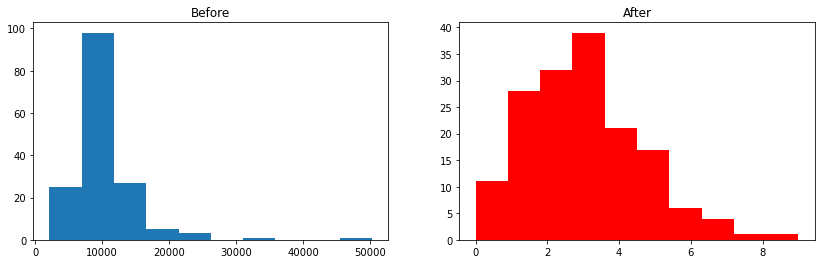

In [196]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,4))
plt.subplot(121)
plt.hist(x_train['Area'])
plt.title('Before')

plt.subplot(122)
plt.hist(x_train_final['Area'], color='red')
plt.title('After')